In [1]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcripts,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,Now… my best friend’s wife is a born again Chr...,Bill Burr
bill,"Recorded Live at the Royal Albert Hall, London...",Hasan Minhaj
dave,Sticks & Stones is Dave Chappelle’s fifth Netf...,Anthony Jeselnik
hasan,[theme music: orchestral hip-hop] [crowd roars...,Dave Chappelle


In [3]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcripts'].apply(pol)
data['subjectivity'] = data['transcripts'].apply(sub)
data

,transcripts,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.073176,0.488676
anthony,Now… my best friend’s wife is a born again Chr...,Bill Burr,0.069493,0.548408
bill,"Recorded Live at the Royal Albert Hall, London...",Hasan Minhaj,-0.043916,0.532279
dave,Sticks & Stones is Dave Chappelle’s fifth Netf...,Anthony Jeselnik,-0.007704,0.521939
hasan,[theme music: orchestral hip-hop] [crowd roars...,Dave Chappelle,0.086856,0.460619


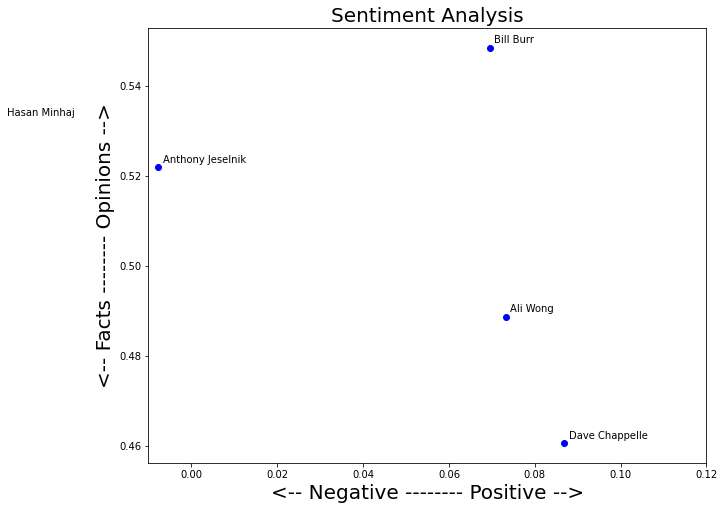

In [6]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, list_of_comedians in enumerate(data.index):
    x = data.polarity.loc[list_of_comedians]
    y = data.subjectivity.loc[list_of_comedians]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=20)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=20)

plt.show()

In [7]:

# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [8]:
# Let's take a look at our data again
data

,transcripts,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.073176,0.488676
anthony,Now… my best friend’s wife is a born again Chr...,Bill Burr,0.069493,0.548408
bill,"Recorded Live at the Royal Albert Hall, London...",Hasan Minhaj,-0.043916,0.532279
dave,Sticks & Stones is Dave Chappelle’s fifth Netf...,Anthony Jeselnik,-0.007704,0.521939
hasan,[theme music: orchestral hip-hop] [crowd roars...,Dave Chappelle,0.086856,0.460619


In [9]:
list_pieces = []
for t in data.transcripts:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage Ali Wong! ♪ What y’all thought Y’all wasn’t gon’ see me? ♪\n♪ I’m the Osirus of this shit♪\n♪ Wu-Tang is here forever, motherfuckers♪\n♪ It’s like this ninety-seven ♪\n♪ Aight my niggas and my niggarettes♪\n♪ Let’s do it like this♪\n♪ I’ma rub your ass in the moonshine♪\n♪ Let’s take it back to seventy-nine♪\n♪ I bomb atomically♪\n♪ Socrates’ philosophies and hypotheses♪\n♪ Can’t define How I be droppin’ these mockeries♪\n♪ Lyrically perform armed robbery ♪\n♪ Flee with the lottery Possibly they spotted me♪\n♪ Battle-scarred shogun♪\n♪ Explosion when my pen hits ♪ Oh, my goodness! I heard a rumor that all of the Asians in this city… Have congregated in this theater tonight. Yeah. Thank you for coming with your white boyfriends. I really… Appreciate it, from the bottom of my heart. I’m so excited to be here. I have not been performing that much at all, in the past two years, because two years ago, I gave birth to a baby girl. And when

In [10]:
# The list has 10 elements, one for each transcript
len(list_pieces)

5

In [11]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [12]:
# Calculate the polarity for each piece of text
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11179629629629631,
  0.05525162337662337,
  -0.003135962802629471,
  0.07573907939039516,
  0.06340367965367964,
  0.09299761686125319,
  0.07616132860698076,
  0.1645792748917749,
  0.02223321458235253,
  0.031564707222601976],
 [0.007363636363636355,
  0.023144820295983085,
  0.03771338724168912,
  0.05770135214579661,
  0.031570749511925976,
  0.043993449231544454,
  0.17868913101963954,
  0.15429396478007593,
  0.03831465919701214,
  0.09640441683919945],
 [-0.019178592278390676,
  -0.12953910839509408,
  -0.10634041495386022,
  -0.029280487504919347,
  -0.04123776938028382,
  0.0018631436314363095,
  -0.06717424579574115,
  -0.08132790341842068,
  0.006415526371298573,
  0.025819999717058537],
 [0.14408516483516484,
  -0.07655058716159463,
  0.05689490857401306,
  0.026190062830687838,
  0.030996148459383765,
  -0.027629592629592626,
  -0.14090756967262982,
  0.07026289682539683,
  -0.022305996472663143,
  -0.09368474662592306],
 [0.13394056175306174,
  0.02376372354497352,
  

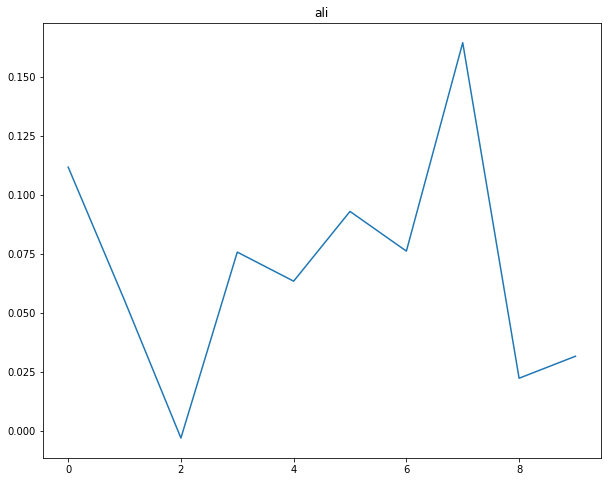

In [13]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

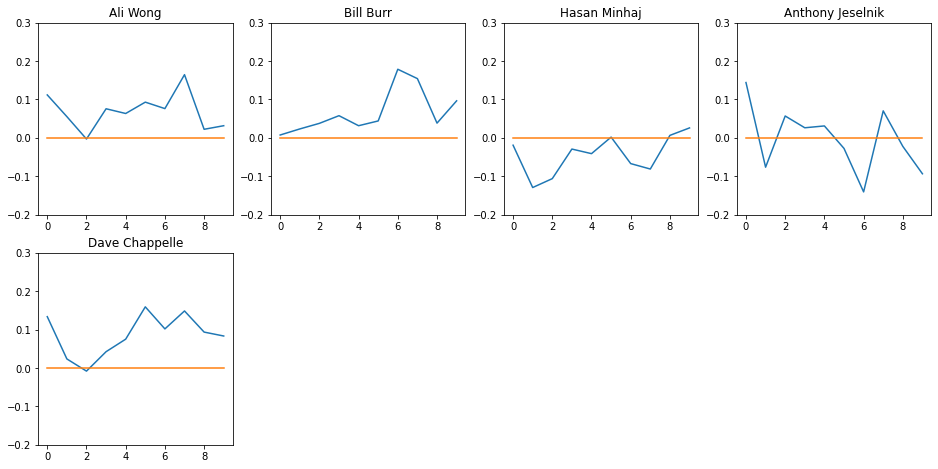

In [14]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()